# Heatmap Test

In [1]:
import os
os.chdir('/home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis')
print("Working Directory:", os.getcwd())

import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
%matplotlib inline

Working Directory: /home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis


In [2]:
frame1_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut001.png'
frame2_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut002.png'
frame3_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut003.png'
frame4_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut004.png'
frame5_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut005.png'

frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)
frame3 = cv2.imread(frame3_path)
frame4 = cv2.imread(frame4_path)
frame5 = cv2.imread(frame5_path)

activity_frame = np.zeros(frame1.shape[:2], np.int)

In [3]:
def frame_energy(previous_frame, current_frame):
    frame_diff = cv2.absdiff(previous_frame, current_frame)
    gs_frame_diff = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
    ret, threshold_frame_diff = cv2.threshold(gs_frame_diff,127,1,cv2.THRESH_BINARY)
    return threshold_frame_diff

In [4]:
activity_frame += frame_energy(frame1, frame2)
activity_frame += frame_energy(frame2, frame3)
activity_frame += frame_energy(frame3, frame4)
activity_frame += frame_energy(frame4, frame5)

Total Energy 40


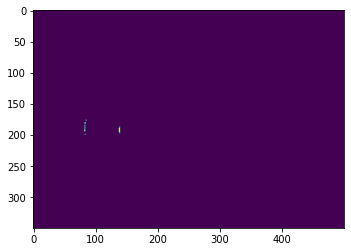

In [5]:
plt.imshow(activity_frame)
print("Total Energy", np.sum(activity_frame))

### Grab sample frame and overlay the heatmap with more energy zones

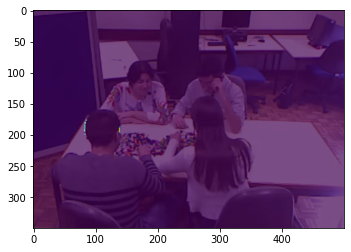

In [6]:
sample_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
overlay_heatmap = activity_frame

plt.imshow(sample_frame)
plt.imshow(activity_frame, cmap=plt.cm.viridis, alpha=.7)

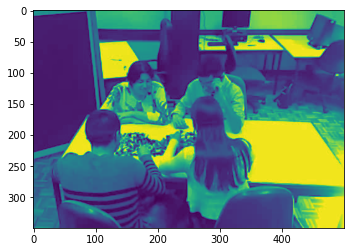

In [7]:
gs = cv2.cvtColor(sample_frame, cv2.COLOR_RGB2GRAY)
plt.imshow(gs)

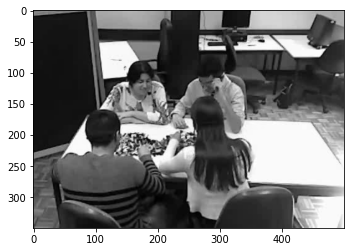

In [8]:
colored = cv2.cvtColor(gs, cv2.COLOR_GRAY2BGR)
plt.imshow(colored)

It is a two step process. First, a normalization is applied to map the values to the interval [0,1]. Then, the colormap maps from [0,1] to colors. For both steps matplotlib provides various options.

If you just call imshow it will apply the a basic linear normalization using the minimum and maximum of your data. The normalization class instance is then saved as an attribute of the artist. The same thing holds for the colormap. 

# Implemented Visualization

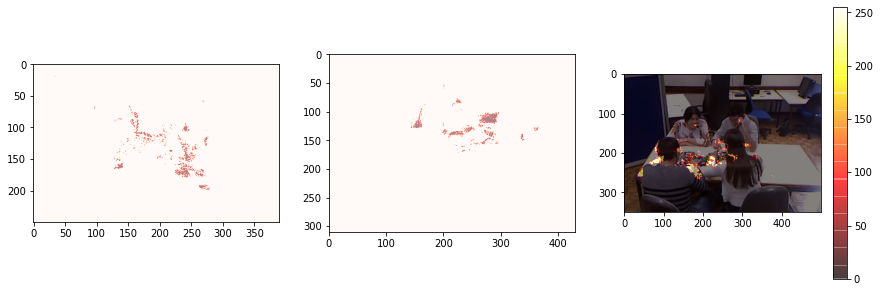

In [81]:
result_pc1 = plt.imread('DATASET_DEP/VIDEO/3CLC9VWRSAMPLE/3CLC9VWRSAMPLE_processed/task_1/htmp_energy_pc1.png', cv2.IMREAD_UNCHANGED)
result_pc2 = plt.imread('DATASET_DEP/VIDEO/3CLC9VWRSAMPLE/3CLC9VWRSAMPLE_processed/task_1/htmp_energy_pc2.png', cv2.IMREAD_UNCHANGED)
result_pc3 = plt.imread('DATASET_DEP/VIDEO/3CLC9VWRSAMPLE/3CLC9VWRSAMPLE_processed/task_1/htmp_energy_pc3.png', cv2.IMREAD_UNCHANGED)

_, mask1 = cv2.threshold(result_pc1, 0, 255, cv2.THRESH_BINARY)
_, mask2 = cv2.threshold(result_pc2, 0, 255, cv2.THRESH_BINARY)
_, mask3 = cv2.threshold(result_pc3, 0, 255, cv2.THRESH_BINARY)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

#overlayed1 = ax1.imshow(sample_frame)
overlayed1 = ax1.imshow(mask1, cmap='Reds', alpha=0.5)

#overlayed2 = ax2.imshow(sample_frame)
overlayed2 = ax2.imshow(mask2, cmap='Reds', alpha=0.5)

overlayed3 = ax3.imshow(sample_frame)
overlayed3 = ax3.imshow(mask3, cmap='hot', alpha=0.5)
cbar = fig.colorbar(overlayed3, ax=ax3)

plt.show()